In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
G = nx.read_gml("train.gml",label='id')

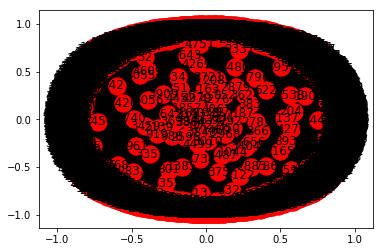

In [3]:
nx.draw_networkx(G)
plt.show()

In [3]:
'''
for i = 1 to n do
Pick a node j uniformly at random from f1; : : : ; i 􀀀 1g
Create edge (i; j)
Label the edge + with prob. p, and – with prob. (1 􀀀 p)
for all neighbors k of j do
if (i; j) is + then
Create edge (i; k) with prob. rp.
if (j; k) is + then
Label edge (i; k) +.
else
Label edge (i; k) + or – with prob. 1/2.
end if
else
if (j; k) is – then
Create edge (i; k) with prob. rn.
Label edge (i; k) –.
end if
end if
end for
end for
'''
nodes = nx.nodes(G)
edges = nx.edges(G)
# To select with probability 'p'
# 'p' is the prob of +ve edges
# -------------get from graph directly later ---- hardcoded for now
p = 0.89
edge_weights_for_new = list(np.random.choice([0, 1], size=len(nodes), p=[0.11,0.89]))

#rp is fraction of neighbours of j, that i discovers given that (i,j) is + . 
#rn is the fraction of neighbours of j, that i discovers given that (i,j) is - .
rp = 0.75
rn = 0.23
#len(edge_weights_for_new)
print(len(nx.nodes(G)))
print(len(nx.edges(G)))
print(len(edge_weights_for_new))

5104
29964
5104


In [4]:
import random
for i in range(3,len(nodes)):
    #Pick a node j uniformly at random from {1....i-1}
    j = random.randrange(1,i-1)
    #Create edge (i; j)
    G.add_edge(i,j)
    #Label the edge + with prob. p, and – with prob. (1-p)
    index_for_new_weight = random.randint(0,len(edge_weights_for_new)-1)
    print(index_for_new_weight)
    if(edge_weights_for_new[index_for_new_weight] == 1):
        G[i][j][0]['weight'] = 1
    else:
        G[i][j][0]['weight'] = 0
        
    neighb_j = G.neighbors(j)
    edges_rp = list(np.random.choice([0, 1], size=len(list(neighb_j)), p=[1-rp,rp]))
    edges_rn = list(np.random.choice([0, 1], size=len(list(neighb_j)), p=[1-rn,rn]))
    list_prob_equal = [0,1]
    
    #for all neighbors k of j do
    for k in neighb_j:
        # If (i,j) is +ve
        if(edge_weights_for_new[index_for_new_weight] == 1):
            # Create edge (i; k) with prob. rp.
            create_ik_or_not = random.randint(0,len(list(neighb_j)))
            if(edges_rp[create_ik_or_not] == 1):
                G.add_edge(i,k)
            # If (j,k) is +ve
            if(G[j][k] == 1):
                # label edge (i,k) as +ve
                G[i][k][0]['weight'] = 1
            else:
                # Label edge (i; k) + or – with prob. 1/2.
                index_ik = random.randint(0,len(list_prob_equal))
                if(list_prob_equal[index_ik] == 1):
                    G[i][k][0]['weight'] = 1
                else:
                    G[i][k][0]['weight'] = 0
                
                
        # If (i,j) is -ve
        else:
            # Create edge (i; k) with prob. rn.
            create_ik_or_not = random.randint(0,len(list(neighb_j)))
            if(edges_rp[create_ik_or_not] == 1):
                G.add_edge(i,k)
            # label (i,k) -ve
            G[i][k][0]['weight'] = 0
            

4249
4404
4593
1522
4397
2251
4972
900
3836
1331
4332
1719
1934
1963
4153
3888
2489
169
1437
1163
2921
4793
1555
3708
2444
1262
1192
1026
2460
4893
1728
1637
28
2292
4422
2327
1250
438
426
144
4356
1193
108
4324
4941
4962
984
1207
257
3510
2637
3112
4061
1324
763
2907
2826
4702
4822
800
1650
3235
3623
4457
2219
217
2457
3682
2611
2894
2978
3980
979
2409
2815
1598
1168
1555
56
1578
4882
577
3226
2117
2000
452
3440
1563
1191
2191
2134
3351
2037
3026
3649
677
2440
994
3928
3134
2573
605
3125
4450
2816
3247
1033
3009
3910
3875
459
2773
2086
1352
3777
2267
346
790
3988
4271
290
3489
4448
2718
4591
4313
2370
4181
1829
1986
4954
4589
166
622
3121
3039
3604
446
4928
4234
3306
434
3184
2530
1163
3207
2079
3324
906
4355
2795
3278
4792
3751
579
3213
1151
3046
2949
21
563
3061
915
2273
2683
5070
2791
4016
3433
4534
2445
1816
4098
3986
3052
3341
5102
62
3832
2661
3935
4509
4832
1808
571
1482
146
3407
3971
2813
3162
4370
1080
2746
887
2176
487
4264
3510
584
3750
2143
1463
1954
572
2778
1481
833
103


333
1170
477
2078
4125
3265
2508
2708
3353
2394
1652
3379
4456
1965
3647
2973
1625
705
4132
3190
5003
271
1431
2680
3323
577
3901
1579
181
3417
2732
3550
2299
4168
3140
4158
1101
5045
3908
3661
4227
3961
112
202
4704
2194
3861
3533
1671
1664
4073
2470
1487
2625
4522
3342
3487
833
1372
4595
2177
2596
3852
2380
201
1918
968
4800
388
4338
2077
554
5050
3557
2650
3618
2045
537
3317
3418
3729
1168
2902
3907
4593
1917
4534
4671
2323
3257
3303
3000
1400
1697
4998
1127
5050
3070
3153
404
4432
5
21
4721
2572
401
4672
670
4364
2509
206
2815
4418
2949
2739
559
1867
2658
4297
2872
4953
3363
4243
2003
1311
649
4207
4542
3419
2534
1165
3659
4
679
1124
2660
1287
3994
2681
4673
3066
2622
2024
2822
4859
4860
3384
104
4577
75
788
1825
3433
1624
3468
3145
2584
2124
3647
662
4705
159
77
932
2188
233
2433
424
445
3719
4537
2518
14
515
4488
1045
3548
1026
2999
4134
1938
2043
3233
2506
4884
2344
1631
4651
3968
1292
2871
3928
3852
3749
3475
1240
964
1336
4721
2956
1416
2929
956
221
4
4528
2688
3479
1207
1568


1516
4022
1087
2565
1256
2691
2738
857
33
4379
3911
3268
2139
4802
729
2739
3761
381
510
3938
1879
3383
645
4647
1169
4953
240
143
2879
4036
3830
2000
1099
1834
135
3450
3400
2829
1056
3227
3940
4339
4317
1878
25
436
1101
3613
5043
4155
73
3929
2251
2813
3415
4994
3899
2457
3318
4895
3496
306
5063
1706
2305
3492
3931
732
1490
3411
333
2941
1456
1054
4290
2251
100
4904
1001
1464
2091
1777
4336
259
2305
1296
1972
2452
1688
666
4352
4426
223
2058
3724
2421
3487
701
4892
117
1407
857
1694
4601
2404
3245
4208
595
1943
446
3746
4289
205
2015
2595
5016
378
3844
4030
4230
1134
1924
4409
2308
3558
3899
1431
104
3005
1751
876
652
454
3779
3014
4150
1721
658
3521
4397
3322
1777
362
2629
3730
728
4817
1190
138
2590
967
651
4370
682
1858
2209
5015
2452
2866
4339
3093
2439
4523
3134
3915
394
2194
1979
1601
239
62
814
2195
1428
2462
4371
4174
4143
303
2866
3903
738
4028
4837
1877
2446
2514
3063
4792
1808
3702
3250
4500
2384
2528
3902
1589
3739
4499
1027
3830
1596
1331
3083
2617
3985
2340
4270
728
373

In [4]:
len(nx.edges(G))

29964

In [5]:
G1=nx.to_directed(G)

In [6]:
triads = nx.triadic_census(G1)

In [7]:
triads

{'003': 22057175638,
 '012': 0,
 '102': 89184426,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 1155054,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 21986}

In [8]:
#no of triads
sum_triads = sum(triads.values()) 
sum_triads

22147537104

In [9]:
ratios_of_triads = []
for i in triads.keys():
    ratios_of_triads.append((i,(triads[i]/sum_triads)))
ratios_of_triads
    

[('003', 0.9959200219159502),
 ('012', 0.0),
 ('102', 0.00402683267133539),
 ('021D', 0.0),
 ('021U', 0.0),
 ('021C', 0.0),
 ('111D', 0.0),
 ('111U', 0.0),
 ('030T', 0.0),
 ('030C', 0.0),
 ('201', 5.215270639692886e-05),
 ('120D', 0.0),
 ('120U', 0.0),
 ('120C', 0.0),
 ('210', 0.0),
 ('300', 9.927063174906781e-07)]

In [10]:
G_old = nx.read_gml("train.gml",label='id')

In [11]:
G1_old=nx.to_directed(G_old)

In [12]:
triads_old = nx.triadic_census(G1_old)

In [13]:
triads_old

{'003': 22057175638,
 '012': 0,
 '102': 89184426,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 1155054,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 21986}

In [14]:
#no of triads in old
sum_triads_old = sum(triads_old.values()) 
sum_triads_old

22147537104

In [16]:
ratios_of_triads_old = []
for i in triads_old.keys():
    ratios_of_triads_old.append((i,(triads_old[i]/sum_triads_old)))
ratios_of_triads_old

[('003', 0.9959200219159502),
 ('012', 0.0),
 ('102', 0.00402683267133539),
 ('021D', 0.0),
 ('021U', 0.0),
 ('021C', 0.0),
 ('111D', 0.0),
 ('111U', 0.0),
 ('030T', 0.0),
 ('030C', 0.0),
 ('201', 5.215270639692886e-05),
 ('120D', 0.0),
 ('120U', 0.0),
 ('120C', 0.0),
 ('210', 0.0),
 ('300', 9.927063174906781e-07)]

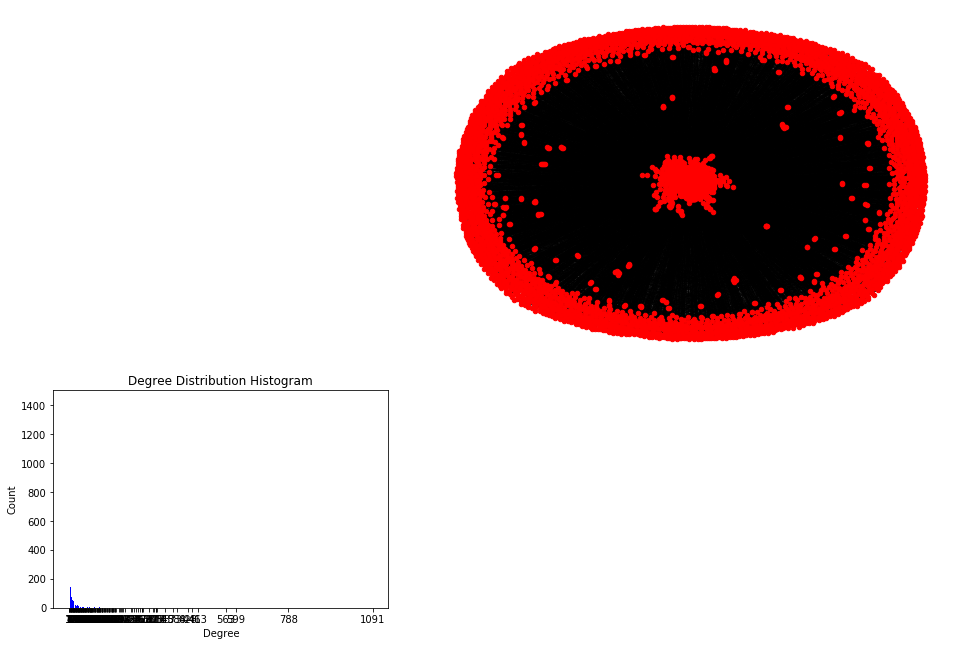

In [30]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Distribution Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([1, 1, 1.2, 1.2])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

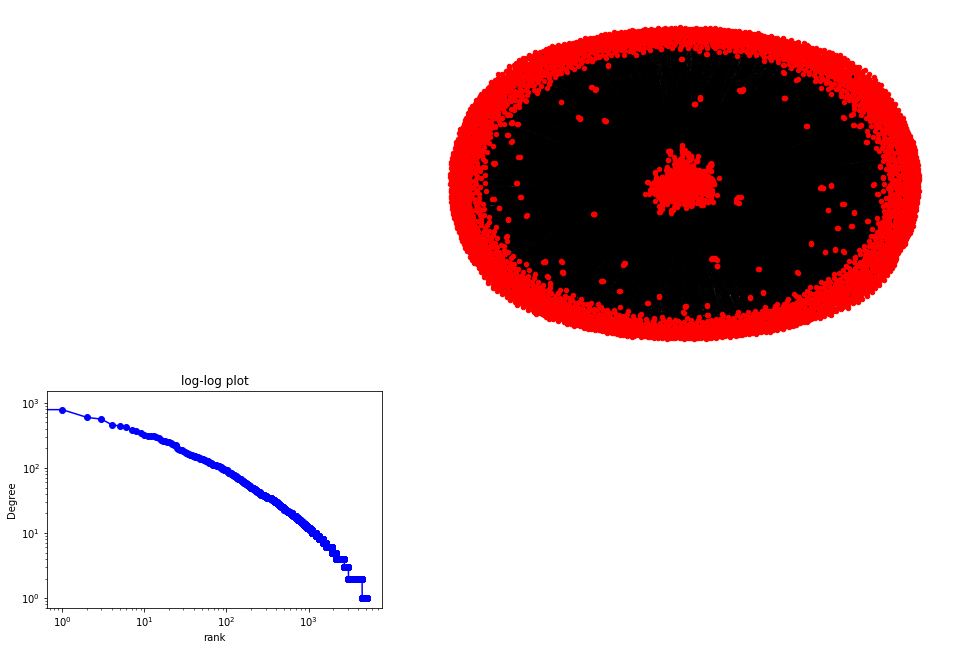

In [28]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
# degreeCount = collections.Counter(degree_sequence)
# deg, cnt = zip(*degreeCount.items())

# fig, ax = plt.subplots()
# plt.bar(deg, cnt, width=0.80, color='b')
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("log-log plot")
plt.ylabel("Degree")
plt.xlabel("rank")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([1, 1, 1.2, 1.2])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

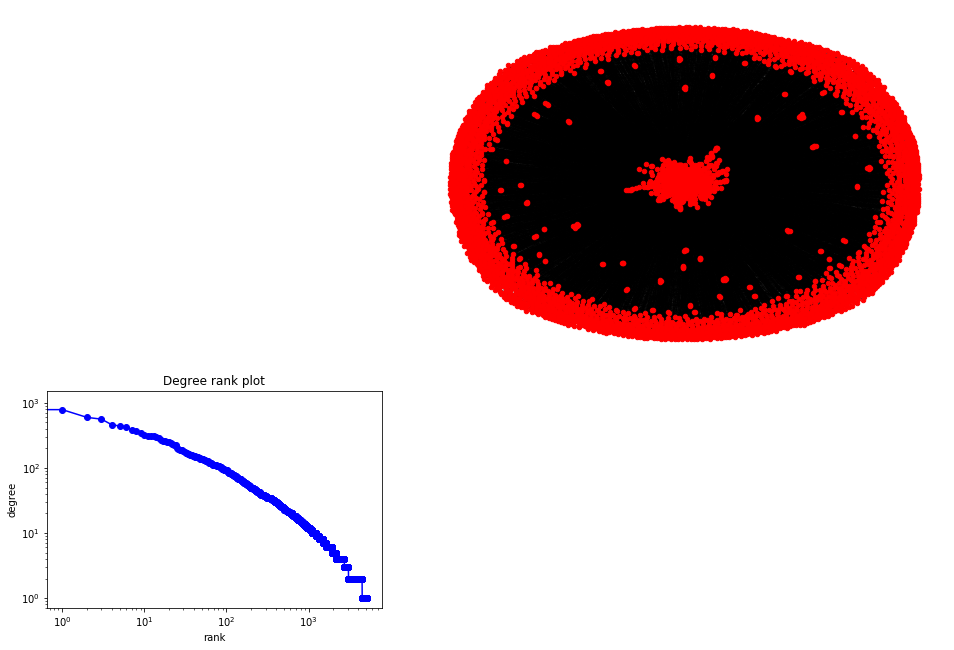

In [31]:

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([1,1,1.2,1.2])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()